In [63]:
def read_calib_files():
       # Load file names
    folder_path = os.path.join(os.getcwd(), "CalibFiles")
    files_in_folder = os.listdir(folder_path)

    # Create list for different data files
    x_files = []
    y_files = []
    zx_files = []
    zy_files = []

    # Insert files into data categories
    for file in files_in_folder:
        if file.startswith("xmatrix"):
            x_files.append(file)
        if file.startswith("ymatrix"):
            y_files.append(file)
        if file.startswith("zxmatrix"):
            zx_files.append(file)
        if file.startswith("zymatrix"):
            zy_files.append(file)

    # Sort filenames, so that they are in the same order
    x_files.sort()
    y_files.sort()
    zx_files.sort()
    zy_files.sort()

    # Load data from files
    x_data = np.empty(([0]))
    for i in range(len(x_files)):
        data = np.loadtxt(os.path.join("CalibFiles", x_files[i]), delimiter=",")
        data = data.flatten()
        x_data = np.append(x_data, data, axis=0)

    y_data = np.empty(([0]))
    for i in range(len(y_files)):
        data = np.loadtxt(os.path.join("CalibFiles", y_files[i]), delimiter=",")
        data = data.T
        data = data.flatten()
        y_data = np.append(y_data, data, axis=0)

    zx_data = np.empty(([0]))
    for i in range(len(zx_files)):
        data = np.loadtxt(os.path.join("CalibFiles", zx_files[i]), delimiter=",")
        data = data.flatten()
        zx_data = np.append(zx_data, data, axis=0)

    zy_data = np.empty(([0]))
    for i in range(len(zy_files)):
        data = np.loadtxt(os.path.join("CalibFiles", zy_files[i]), delimiter=",")
        data = data.T
        data = data.flatten()
        zy_data = np.append(zy_data, data, axis=0)

    # Calculate z mean
    z_data = (zx_data + zy_data) / 2

    # Create matrix
    matrix = np.r_[[x_data], [y_data], [z_data], [np.ones(len(x_data))]]

    return matrix
    

In [64]:
import os
import numpy as np


def read_correct_matrix():
    # Load file names
    folder_path = os.path.join(os.getcwd(), "correct_matrix")
    files_in_folder = os.listdir(folder_path)

    # Create list for different data files
    x_files = []
    y_files = []
    z_files = []

    # Insert files into data categories
    for file in files_in_folder:
        if file.startswith("x"):
            x_files.append(file)
        if file.startswith("y"):
            y_files.append(file)
        if file.startswith("z"):
            z_files.append(file)

    # Sort filenames, so that they are in the same order
    x_files.sort()
    y_files.sort()
    z_files.sort()

    # Load data from files
    x_data = np.empty(([0]))
    for i in range(len(x_files)):
        data = np.loadtxt(os.path.join("correct_matrix", x_files[i]), delimiter=",")
        data = data.flatten()
        x_data = np.append(x_data, data, axis=0)

    y_data = np.empty(([0]))
    for i in range(len(y_files)):
        data = np.loadtxt(os.path.join("correct_matrix", y_files[i]), delimiter=",")
        data = data.flatten()
        y_data = np.append(y_data, data, axis=0)

    z_data = np.empty(([0]))
    for i in range(len(z_files)):
        data = np.loadtxt(os.path.join("correct_matrix", z_files[i]), delimiter=",")
        data = data.flatten()
        z_data = np.append(z_data, data, axis=0)

    # Create matrix
    matrix = np.r_[[x_data], [y_data], [z_data], [np.ones(len(x_data))]]

    return matrix

In [65]:
from inspect import _void
import matplotlib.pyplot as plt
import numpy as np
import ipympl

#% matplotlib notebook


def plot_matrix(m):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for i in range(m.shape[1]):
        ax.scatter(m[0, i], m[1, i], m[2, i])

    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_zlabel("z-axis")

    plt.show()
    pass


In [70]:
from inspect import _void
import matplotlib.pyplot as plt
import numpy as np
import ipympl

#% matplotlib notebook


def plot_matrices(m1, m2):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for i in range(m1.shape[1]):
        ax.scatter(m1[0, i], m1[1, i], m1[2, i], color="red")
    
    for i in range(m2.shape[1]):
        ax.scatter(m2[0, i], m2[1, i], m2[2, i], color="blue")

    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_zlabel("z-axis")

    plt.show()
    pass

In [66]:
mat_calib = read_calib_files()
mat_correct = read_correct_matrix()
#plot_matrix(mat_correct)
diff = mat_calib - mat_correct
print((np.abs(diff)))

[[2.000000e-02 2.000000e-02 1.000000e-02 0.000000e+00 0.000000e+00
  1.000000e-02 2.000000e-02 4.000000e-02 2.000000e-02 1.000000e-02
  3.000000e-02 3.000000e-02 5.000000e-02 3.000000e-02 3.000000e-02
  2.000000e-02 1.000000e-02 3.000000e-02 4.000000e-02 1.000000e-02
  1.000000e-02 5.000000e-02 4.000000e-02 5.000000e-02 4.000000e-02
  2.000000e-02 1.000000e-02 3.000000e-02 2.000000e-02 2.000000e-02
  2.000000e-02 2.000000e-02 2.000000e-02 1.000000e-02 1.000000e-02
  2.000000e-02 4.000000e-02 2.000000e-02 1.000000e-02 2.000000e-02
  2.000000e-02 3.000000e-02 3.000000e-02 1.000000e-02 1.000000e-02
  2.000000e-02 3.000000e-02 2.000000e-02 4.000000e-02 1.000000e-02
  0.000000e+00 3.000000e-02 1.000000e-02 3.000000e-02 1.000000e-02
  0.000000e+00 2.000000e-02 2.000000e-02 1.000000e-02 1.000000e-02
  0.000000e+00 3.000000e-02 2.000000e-02 2.000000e-02 6.000000e-02
  1.000000e-02 3.000000e-02 3.000000e-02 2.000000e-02 2.000000e-02
  2.000000e-02 2.000000e-02 2.000000e-02 2.000000e-02 3.000000

In [67]:
# calculate transformation
m_rec,resid,rank,sing = np.linalg.lstsq(mat_calib.T,mat_correct.T)

m_rec = m_rec.T

test = m_rec @ mat_calib

#print(test2)

print(np.amax(np.abs(test - mat_correct)))

0.061234193206715304


/tmp/ipykernel_8214/141142360.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m_rec,resid,rank,sing = np.linalg.lstsq(mat_calib.T,mat_correct.T)


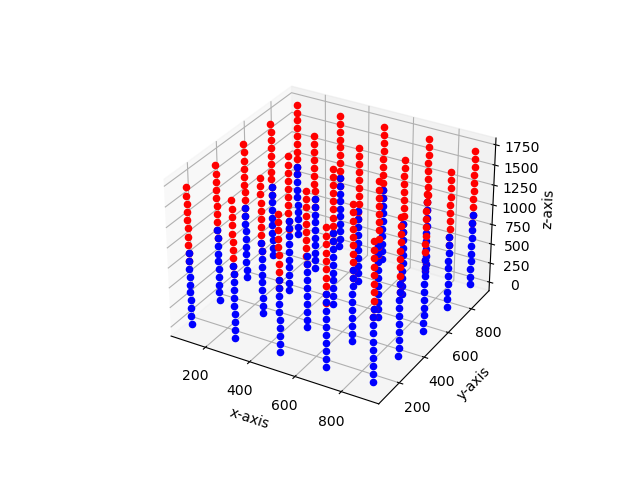

In [72]:
plot_matrices(mat_calib, mat_correct)

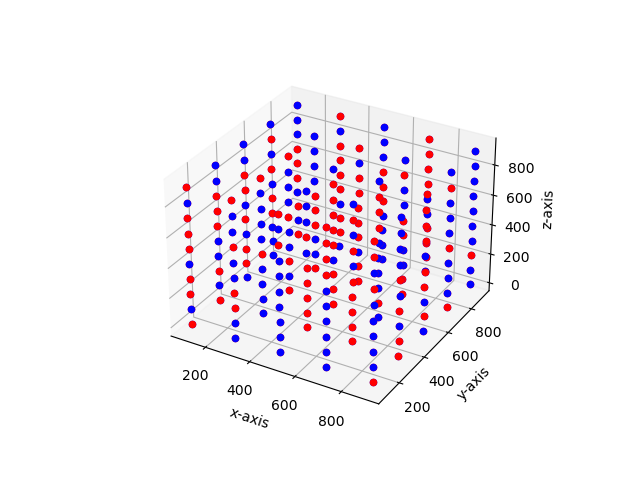

In [73]:
plot_matrices(test, mat_correct)

In [68]:
#print(mat_calib[0])
#print(mat_correct[0])
#print(np.amax(np.abs(mat_calib[3] - mat_correct[3])))

length = []
for i in range(len(mat_calib[0])):
    leng  = np.sqrt((mat_calib[0,i] - mat_correct[0, i])**2 + (mat_calib[1,i] - mat_correct[1, i])**2 + (mat_calib[2,i] - mat_correct[2, i])**2)
    length.append(leng)
print(length)

[798.3835003131327, 798.3830003131329, 798.3830003131329, 798.3830006018416, 798.3830000626266, 798.383001064652, 798.3830003131329, 798.3830012525317, 798.3830008141457, 798.3830001133542, 798.3830016163922, 798.3830011272786, 798.38300256769, 798.3830008141457, 798.3830006143669, 798.3830005010128, 798.3830006262659, 798.3830011272786, 798.3830012525317, 798.3830001252533, 798.3830002887087, 798.383001816171, 798.3830012525317, 798.383001816171, 798.383001064652, 798.3800002505075, 798.3800000626269, 798.3800006262684, 798.380001879431, 798.3800005010147, 798.3800005010147, 798.3800003131342, 798.3800003131342, 798.3800003131342, 798.3800003131342, 798.3800005010147, 798.3800012525365, 798.3800003131342, 798.3800003131342, 798.3800018161778, 798.3800003131342, 798.3800006262684, 798.3800005636415, 798.3800001252538, 798.3800003131342, 798.3800002505075, 798.3800005636415, 798.3800002505075, 798.3800010646561, 798.3800000626269, 798.3835, 798.3835005636389, 798.3830000626266, 798.3830

In [69]:
for i in range(len(mat_calib[0])):
    leng  = np.sqrt((mat_calib[0,i] - mat_correct[0, i])**2 + (mat_calib[1,i] - mat_correct[1, i])**2 + (mat_calib[2,i] - mat_correct[2, i])**2)
    print("test")
    print(mat_calib[0, i], " ", mat_calib[1, i], " ", mat_calib[2, i])
    print(mat_correct[0, i], " ", mat_correct[1, i], " ", mat_correct[2, i])

test
100.02   99.99   808.3835
100.0   100.0   10.0
test
299.98   100.01   808.383
300.0   100.0   10.0
test
499.99   100.02   808.383
500.0   100.0   10.0
test
700.0   100.031   808.383
700.0   100.0   10.0
test
900.0   99.99   808.383
900.0   100.0   10.0
test
100.01   299.96   808.383
100.0   300.0   10.0
test
299.98   300.01   808.383
300.0   300.0   10.0
test
500.04   299.98   808.383
500.0   300.0   10.0
test
699.98   299.97   808.383
700.0   300.0   10.0
test
899.99   299.991   808.383
900.0   300.0   10.0
test
100.03   500.041   808.383
100.0   500.0   10.0
test
300.03   499.97   808.383
300.0   500.0   10.0
test
500.05   499.96   808.383
500.0   500.0   10.0
test
699.97   499.98   808.383
700.0   500.0   10.0
test
899.97   499.991   808.383
900.0   500.0   10.0
test
99.98   699.98   808.383
100.0   700.0   10.0
test
300.01   699.97   808.383
300.0   700.0   10.0
test
499.97   699.97   808.383
500.0   700.0   10.0
test
700.04   699.98   808.383
700.0   700.0   10.0
test
899.99 

In [78]:
length = []
for i in range(len(mat_calib[0])):
    leng  = np.sqrt((test[0,i] - mat_correct[0, i])**2 + (test[1,i] - mat_correct[1, i])**2 + (test[2,i] - mat_correct[2, i])**2)
    length.append(leng)
length.sort()
print(length)

[0.004502029663118702, 0.005715584794109784, 0.005723739783416681, 0.005941252972153389, 0.006294928678122759, 0.0068044131504354476, 0.007035945548828641, 0.00739548784447676, 0.008765756754957253, 0.009469835920613366, 0.009557137772992703, 0.010138881249137904, 0.010443444973473522, 0.011995258609927466, 0.01246821900040912, 0.012500605762609023, 0.013492651581068148, 0.01374642330100932, 0.01396664490177834, 0.014226320709956438, 0.014470101604918004, 0.014622954878137369, 0.014742079992944988, 0.014822433120059455, 0.015176386498229652, 0.015189179752464107, 0.01534807247936607, 0.015550185544494789, 0.015792319785310285, 0.01603880328838378, 0.01617130911608275, 0.016204038959911637, 0.016284915976542306, 0.016576462947389743, 0.016966153395664606, 0.017139100583555722, 0.01729380988794208, 0.01740389091946822, 0.017450681757487246, 0.01822350990263527, 0.018418099616834858, 0.018761079549484992, 0.01916185680457416, 0.01919810556063475, 0.019242809792882853, 0.019350140002611597